In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data generators for training, validation, and test
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    r'C:\Users\VARUN\Desktop\Python\AI\image data\train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    r'C:\Users\VARUN\Desktop\Python\AI\image data\validation',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    r'C:\Users\VARUN\Desktop\Python\AI\image data\test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Adjust steps based on dataset size
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model with repeat
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy:.4f}")

# Save the model
model.save('pest_detection_model.h5')

Found 2286 images belonging to 4 classes.
Found 569 images belonging to 4 classes.
Found 316 images belonging to 4 classes.
Epoch 1/10
71/71 [==============================] - 17s 224ms/step - loss: 1.1390 - accuracy: 0.5346 - val_loss: 0.7818 - val_accuracy: 0.6121
Epoch 2/10
71/71 [==============================] - 16s 226ms/step - loss: 0.7749 - accuracy: 0.6779 - val_loss: 0.5049 - val_accuracy: 0.8051
Epoch 3/10
71/71 [==============================] - 16s 221ms/step - loss: 0.6327 - accuracy: 0.7507 - val_loss: 1.4600 - val_accuracy: 0.6360
Epoch 4/10
71/71 [==============================] - 15s 216ms/step - loss: 0.5493 - accuracy: 0.8070 - val_loss: 0.4063 - val_accuracy: 0.8621
Epoch 5/10
71/71 [==============================] - 15s 204ms/step - loss: 0.4254 - accuracy: 0.8461 - val_loss: 0.3943 - val_accuracy: 0.8732
Epoch 6/10
71/71 [==============================] - 15s 208ms/step - loss: 0.4559 - accuracy: 0.8341 - val_loss: 0.3111 - val_accuracy: 0.8989
Epoch 7/10
71/71 [

In [9]:
import pickle
# Save the training history
with open('training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

Found 316 images belonging to 4 classes.
10/10 [==============================] - 1s 43ms/step - loss: 0.2808 - accuracy: 0.9051
Test accuracy: 0.9051


<Figure size 600x600 with 0 Axes>

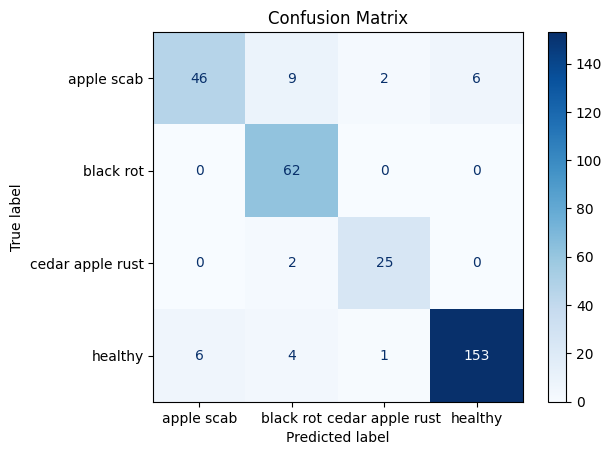

1/1 [==============================] - 0s 202ms/step


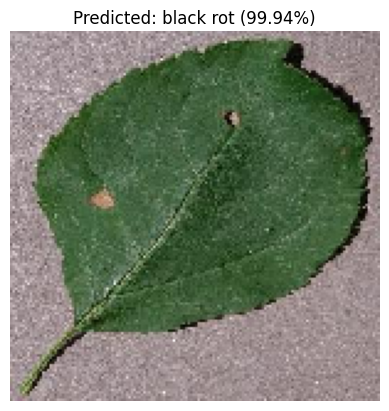

In [7]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os

# Load the pre-trained model
model = load_model('pest_detection_model.h5')

# Data generator for test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    r'C:\Users\VARUN\Desktop\Python\AI\image data\test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Evaluate the model on test data
test_generator.reset()
predictions = model.predict(test_generator, steps=len(test_generator))
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_generator.class_indices.keys()))
plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Function to predict a single image
def predict_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(150, 150))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    class_labels = list(test_generator.class_indices.keys())
    predicted_class = class_labels[np.argmax(prediction)]
    confidence = np.max(prediction) * 100

    plt.imshow(img)
    plt.title(f'Predicted: {predicted_class} ({confidence:.2f}%)')
    plt.axis('off')
    plt.show()
    return predicted_class, confidence

# Example usage: Predict an image (replace with your image path)
image_path = r'C:\Users\VARUN\Desktop\Python\AI\image data\test\black rot\4db50338-6897-4d69-8147-717cae13879c___JR_FrgE.S 8645.JPG'  # Update this path
if os.path.exists(image_path):
    predict_image(image_path)
else:
    print("Image path does not exist. Please update the image_path variable with a valid path.")

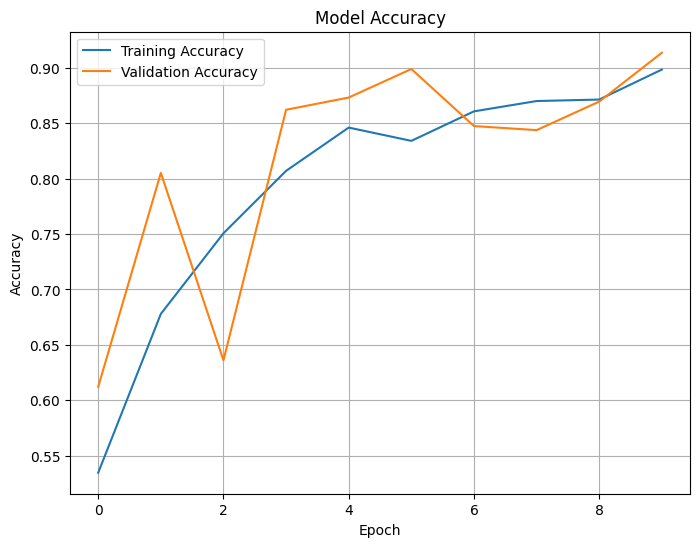

In [10]:
import matplotlib.pyplot as plt
import pickle

# Load the saved training history
with open('training_history.pkl', 'rb') as file:
    history = pickle.load(file)

# Plot training & validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

Found 2286 images belonging to 4 classes.
Found 569 images belonging to 4 classes.
Found 316 images belonging to 4 classes.
1/1 [==============================] - 0s 16ms/step


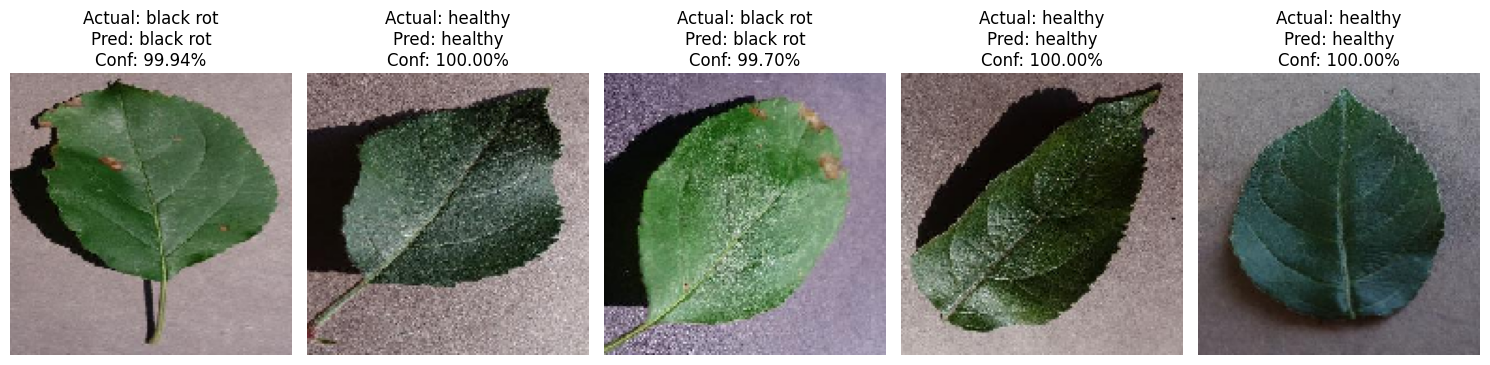

In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os
import random

# Load the pre-trained model
model = load_model('pest_detection_model.h5')

# Data generators for train, validation, and test sets
base_dir = r'C:\Users\VARUN\Desktop\Python\AI\image data'
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=(150, 150),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

validation_generator = datagen.flow_from_directory(
    os.path.join(base_dir, 'validation'),
    target_size=(150, 150),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

test_generator = datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=(150, 150),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

# Get class labels and total samples from all generators
class_labels = list(train_generator.class_indices.keys())
all_generators = [train_generator, validation_generator, test_generator]
all_true_classes = [
    train_generator.classes,
    validation_generator.classes,
    test_generator.classes
]
all_samples = [
    train_generator.samples,
    validation_generator.samples,
    test_generator.samples
]

# Predict on all data
all_predictions = []
for gen in all_generators:
    gen.reset()
    predictions = model.predict(gen, steps=len(gen))
    all_predictions.append(np.argmax(predictions, axis=1))

# Function to display actual vs predicted for multiple images from different directories
def display_predictions(num_images=5):
    plt.figure(figsize=(15, 5))
    selected_indices = []
    for _ in range(min(num_images, sum(all_samples))):
        # Randomly select a directory and index
        dir_idx = random.randint(0, len(all_generators) - 1)
        gen = all_generators[dir_idx]
        true_classes = all_true_classes[dir_idx]
        predictions = all_predictions[dir_idx]
        samples = all_samples[dir_idx]
        
        idx = random.randint(0, samples - 1)
        while idx in selected_indices:  # Avoid duplicate images
            idx = random.randint(0, samples - 1)
        selected_indices.append(idx)

        # Move generator to the selected index
        gen.reset()
        for _ in range(idx):
            next(gen)
        
        # Get the image and labels
        image, _ = next(gen)
        true_label_idx = true_classes[idx]
        true_label = class_labels[true_label_idx]
        predicted_label_idx = predictions[idx]
        predicted_label = class_labels[predicted_label_idx]
        confidence = model.predict(image)[0][predicted_label_idx] * 100

        # Plot the image
        plt.subplot(1, num_images, len(selected_indices))
        plt.imshow(image[0])
        plt.title(f'Actual: {true_label}\nPred: {predicted_label}\nConf: {confidence:.2f}%')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display predictions for 5 images from different directories
display_predictions(5)